<>:52: SyntaxWarning: invalid escape sequence '\d'
<>:52: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4227039490.py:52: SyntaxWarning: invalid escape sequence '\d'
  df['Year'] = pd.to_numeric(df['Year'].astype(str).str.extract('(\d{4})')[0], errors='coerce')


Saving archive (1).zip to archive (1) (5).zip
First 5 rows of dataset:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB

Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Mean Absolute Error (MAE): 1.0495625054893813
Mean Squared Error (MSE): 1.6864004365428564
R2 Score: 0.08929055052181334


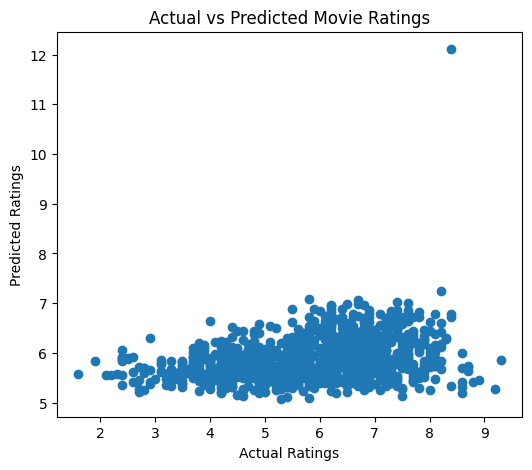


TASK 2: MOVIE RATING PREDICTION COMPLETED SUCCESSFULLY ✅


In [6]:
# =========================================
# MOVIE RATING PREDICTION – SINGLE CELL CODE
# =========================================

# Upload dataset
from google.colab import files
uploaded = files.upload()

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile # Import the zipfile module

# Load dataset
# NOTE: rename file if your dataset name is different

# Identify the uploaded zip file
zip_file_name = list(uploaded.keys())[0]

# Unzip the file and read the CSV
csv_file_name = None
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('.') # Extract all contents to the current directory

    # Find the CSV file within the extracted contents
    for f_name in zip_ref.namelist():
        if f_name.endswith('.csv'):
            csv_file_name = f_name
            break

if csv_file_name:
    df = pd.read_csv(csv_file_name, encoding='latin-1')
else:
    raise FileNotFoundError("No CSV file found inside the uploaded zip archive.")

print("First 5 rows of dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

# -----------------------------------------
# Data Cleaning
# -----------------------------------------

# Clean and convert 'Year' column: extract 4 digits and convert to float
df['Year'] = pd.to_numeric(df['Year'].astype(str).str.extract('(\d{4})')[0], errors='coerce')

# Clean and convert 'Duration' column: remove ' min' and convert to float
df['Duration'] = pd.to_numeric(df['Duration'].astype(str).str.replace(' min', '', regex=False), errors='coerce')

# Clean and convert 'Votes' column: remove commas and convert to float
df['Votes'] = pd.to_numeric(df['Votes'].astype(str).str.replace(',', '', regex=False), errors='coerce')

# Drop rows with missing values after cleaning
df.dropna(inplace=True)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical columns if present (using correct column names)
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_features:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# -----------------------------------------
# Feature Selection
# -----------------------------------------

# Explicitly select numerical and encoded categorical features for X
# Exclude 'Name' as it is a descriptive text and not a feature for prediction
feature_columns = ['Year', 'Duration', 'Votes', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = df[feature_columns]
y = df['Rating']

# -----------------------------------------
# Train-Test Split
# -----------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------
# Model Training (Regression)
# -----------------------------------------

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------------------
# Prediction
# -----------------------------------------

y_pred = model.predict(X_test)

# -----------------------------------------
# Model Evaluation
# -----------------------------------------

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\nMean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# -----------------------------------------
# Visualization
# -----------------------------------------

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()

print("\nTASK 2: MOVIE RATING PREDICTION COMPLETED SUCCESSFULLY ✅")
